# 최적화 방법

지금까지 항상 경사하강법을 사용해 매개변수를 업데이트하고 비용함수 값을 최소화 시켰습니다.

이번에는 최적화 심화과정을 배울겁니다. 심화과정에서는 학습속도 개선 그리고 최종 결과로 비용함수 값이 좀더 작게 나오도록 할겁니다.

좋은 최적화 알고리즘을 사용하는 건 하루종일 기다리는 것에서 몇시간으로 바꾸고 좋은 결과를 도출합니다.

경사하강법은 최적의 $J$를 찾기 위해 아래로 흘러내려가는 방법입니다. 
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> **Figure 1** </u>: 
    ** 비용함수 값을 최소화 하는 것은 올바른 길로 높은 산에서 하강하는 것과 비슷합니다.**<br> 매번 학습 단계에서, $J$값을 작게하는 방향으로 이동하면서 매개변수를 업데이트합니다. </center></caption>

**Notations**: 대게 `a` 에 대한 미분값으로 $\frac{\partial J}{\partial a } = $ `da`를 변화량이라고 합니다..

시작에 앞서 필요한 라이브러리를 호출합시다

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1 - 경사하강법

최적화 알고리즘에서 가장 간단한 방법은 경사하강법입니다.

학습 할떄 모든 학습 데이터 $m$를 한번에 적용하는 경사하강법을 Batch Gradient Descent 라고 합니다.

**Warm-up exercise**: 경사하강법을 사용해 매개변수를 업데이트하는 방법은 다음과 같습니다. ($l = 1, ..., L$): 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

L은 신경망의 층을 의미하고 $alpha$ 는 학습률을 의미합니다.

모든 매개변수는 `parameters`라는 변수명의 사전에 저장합니다. 그리고 매 학습 반복으로 `I`는 0에서 시작하고 `for`문을 통해 반복합니다.
매개변수 호출은 $W^{[1]}$ and $b^{[1]}$식으로 합니다.

반복횟수는 0부터 시작 매개변수는 1부터 시작하는것을 명심하세요~

In [4]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [5]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


**Expected Output**:

```
W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]
```

좀 다르게 Stochastic Gradient Descent(SGD) 는 batch size가 1개씩 학습될때를 말합니다.

업데이트 방식은 크게 다르지 않습니다.

단지 이전 GD와 차이는 한번에 한개를 학습하느냐와 한번에 학습데이터 모두를 학습하느냐입니다.

다음 코드는 SGD 와 Bath GD (=GD)의 차이를 설명합니다.


- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost += compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost += compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```


SGD는 업데이트 하기 위해 학습데이터를 1개씩 사용합니다.

만약 학습데이터가 엄청 크다면 SGD는 아마 빠를겁니다. 그러나 매개변수들 값들이 들쑥날쑥하게 변동이 심할겁니다.
사진으로 확인해보시죠: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **SGD vs GD**<br> "+" 는 비용함수가 최소값일때 위치를 의미합니다. SGD는 최적값에 도달하는데 많은 변동이 있습니다. 그러나 각 학습단계가 GD 보다 빠르게 진행됩니다.</center></caption>

**Note** also that implementing SGD requires 3 for-loops in total:
1. Over the number of iterations
2. Over the $m$ training examples
3. Over the layers (to update all parameters, from $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)

이번에는 좀더 빠르게 결과를 도출하도록 할겁니다. 한번 학습하는데 1개를 사용하지도 전체를 사용하지도 않고 적당한 중간값을 사용해 학습할겁니다.

이 방법을 Mini-batch gradient descent라고 합니다. mini-batch GD는 GD와 SGD에서 사용하는 학습데이터 수의 사이 값을 사용합니다.
각각 학습데이터에 대한 반복횟수보다 적은 수의 반복으로 학습시킵니다.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Figure 2** </u>: <font color='purple'>  **SGD vs Mini-Batch GD**<br> "+" 는 최적의 비용함수 값이 위치한 곳을 알려줍니다. mini-batch GD는 좀더 적은 횟수로 도달할 수 있어 더 빠릅니다.</center></caption>

<font color='blue'>  
**기억해야할 점**:  
- mini-batch와 stochastic의 차이는 한번 학습하는데 사용하는 데이터 수입니다.    
- 하이퍼파라미터인 학습률 $\alpha$를 수정해줘야합니다.
- 잘 조정된 mini-batch size는 대게 다른 GD 방법보다 빠릅니다. (특별히 데이터셋이 많을때)

## 2 - Mini-Batch 경사하강법 (mini-batch GD)

mini-batch 를 어떻게 설계하는지 공부해봅시다.

두 단계를 거쳐야합니다:
- **Shuffle**: 
아래처럼 학습데이터를 랜덤하게 섞습니다. 각 X, Y의 column(열) 값은 학습데이터 샘플을 의미합니다. X와 Y는 서로 매핑된 상태로 섞인겁니다. (각 X와 Y는 $i^{th}$ 로 확인 할 수 있습니다.) 섞인 학습데이터는 또 랜덤하게 mini-batches에 배정됩니다.

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: 
여기서는 `mini_batch_size`를 64로 사용합니다. Partition은 섞인 X, Y를 배치 사이즈에 맞게 할당시킵니다. 하지만 매번 학습데이터 갯수는 배치사이즈에 딱 떨어지지 않기때문에 마지막 미니 배치는 좀 작을 수 밖에 없습니다. 하지만 크게 신경쓸필요 없습니다.
결과적으로 이런식으로 분리됩니다: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

**Exercise**: `random_mini_batches`를 실행시켜봅시다. 
섞는 부분은 미리 작성해뒀습니다. 분할을 위해서 다음 코드를 사용하세요  
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

마지막 미니배치는 작을 수도 있습니다.


그래서 다음 표기법을 사용합니다. $\lfloor s \rfloor$는 $s$ 를 소숫점 이하 숫자를 내리는 의미입니다. (파이썬에서는 `math.floor(s)`를 사용합니다). 


마지막 배치에서 학습데이터 수가 `mini_batch_size=64` 보다 작다면 $\lfloor \frac{m}{mini\_batch\_size}\rfloor$를 사용해야합니다.  
결과적으로 마지막 배치는 ($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$)이런 형태로 나올겁니다.. 

In [6]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y) #
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case. (math.floor 은 정수를 반환하는 값입니다.)
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # print(len(mini_batches))
    # print(mini_batches[0][0][0], '\n') # 미니배치 
    return mini_batches

In [7]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


**Expected Output**:

<table style="width:50%"> 
    <tr>
    <td > **shape of the 1st mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **shape of the 1st mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **mini batch sanity check** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
</table>

<font color='blue'>  
**What you should remember**:  
- 미니 배치를 위해서는 셔플링과 파티션 단계가 필요합니다.
- 효과적인 미니배치 사이즈는 2의 제곱 수로 사용합니다 예를들어 16, 32, 64, 128을 사용합니다.

## 3 - Momentum 모멘텀

mini-batch GD는 데이터 셋의 일부를 보고 매개변수를 업데이트합니다. 그렇기때문에 업데이트되는 변화가 일부 데이터셋에 의존하고 전체 데이터 셋을 반영하기 힘들어 최적값으로 가는데 많은 진동이 생기는 겁니다.

모멘텀은 이러한 진동을 줄여줘서 최적값으로 좀 더 부드럽게 접근하는 방법입니다.

모멘텀은 과거 단계의 변화량을 추가적으로 사용합니다. 우리는 $v$ 라는 변수에 이전 변화량 즉 방향성을 저장합니다.

그리고 이전 단계의 값들은 지수평균을 사용해 반영합니다.

$v$의 방향성과 속도 또한 고려해봐야하는데요 


<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>**Figure 3**</u><font color='purple'>: <br>빨간색 포인트는 모멘텀을 사용한 매 학습마다 이동하는 방향을 의미합니다. (첫 이동은 이전 이동이 없습니다)<br>파란색 포인트는 모멘텀을 적용하지 않은 GD 입니다. 모멘텀을 적용했을 때보다 방향이 크게 바뀌는것을 알 수 있습니다.<br> <font color='black'> </center>
 

**Exercise**: 속도를 초기화 하세요.
    속도 $v$는 사전형태로 일단 0행렬로 초기화해야합니다. 그리고 예전 `grads`와 같이 keys 값들을 갖습니다:

for $l =1,...,L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
```
**Note** 반복문은 0부터 시작하지만 매개변수들은 1부터 시작하는것을 기억하세요
    

In [8]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l+1)])
        ### END CODE HERE ###
        
    return v

In [9]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

v["dW1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]


**Expected Output**:

```
v["dW1"] =
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db1"] =
[[ 0.]
 [ 0.]]
v["dW2"] =
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db2"] =
[[ 0.]
 [ 0.]
 [ 0.]]
```

**Exercise**:  모멘텀을 사용해 업데이트를 해봅시다. 업데이트는 다음과 같이 진행합니다. (반복 for $I = 1, ..., L$):  
$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

L은 층 수를 의미합니다. $\beta$는 모멘텀 계수를 의미하고 $\alpha$는 학습률을 의미합니다.

모든 매개변수는 `parmeters` 사전에 저장됩니다.

l 은 0부터 시작하고 매개변수의 첨자들은 1부터 시작하는것을 유의하세요~

In [10]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l + 1)] = beta * v["dW" + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta * v["db" + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]
        # update parameters
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v["db" + str(l + 1)]
        ### END CODE HERE ###
        
    return parameters, v

In [11]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))


print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


**Expected Output**:

```
W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]
```

**Note** that:
- 속도값들은 0으로 초기화 하고 시작합니다. 알고리즘은 0으로 부터 시작해 점차 큰 값으로 변하게 할겁니다.
- 만약 $\beta = 0$ 이라면 모멘텀 없는 GD가 됩니다. 

**$\beta$ 는 어떻게 정하죠??**

- 엄청 큰 $\beta$는 부드럽게 업데이트하도록 합니다. $\beta$가 크다는 것은 이전 변화량의 영향이 커진다는 의미로 새로운 값이 들어와도 크게 변하지 않기 때문입니다. 동시에 방향성 개선이 느려지겠죠

- 흔히 $\beta$를 0.8에서 0.999 값을 사용합니다. 시작하기 좋은 값은 0.9입니다. 수정하면서 변화를 확인해보세요~

- 최적의 $\beta$값을 찾는것은 $J$값을 최소화하는 $\beta$를 반복을 통해서 찾아야합니다.

<font color='blue'>  
**기억해야할 점**:  
- 모멘텀은 이전 변화를 반영하면서 학습하는 것입니다. (SGD, GD, miniGD 모두에게 적용가능합니다.)
- 좋은 모델을 만들기 위해 $\beta$ 와 $\alpha$를 튜닝해야합니다.

## 4 - Adam

아담은 가장 효율적인 최적화 알고리즘입니다.
아담은 강의 영상에서 설명한 RMSProp과 모멘텀의 개념을 합친 알고리즘입니다.


**Adam이 어떤식으로 작동하나요?**
1. 이전 변화를 지수적 이동평균 방법으로 반영합니다. 그리고 변수 $v$ 그리고 $v^{corrected}$ (bias correction이 적용된) 에 저장합니다.

2. 이전 변화에 제곱한 값을 지수이동평균 방법으로 반영합니다, 변수 $s$ (before bias correction) 와 $s^{corrected}$ (with bias correction)에 저장합니다. 

3. "1"과 "2" 정보를 사용해 매개변수들을 업데이트 합니다.


The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$

where:
- Adam을 거친 횟수라고 생각하면 됩니다.
- L 몇번째 layer를 의미하는지로 이해하면 됩니다.
- $\beta_1$ 와 $\beta_2$ 는 지수이동평균을 조절하는 하이퍼 파라미터입니다.
- $\alpha$ 는 학습률입니다.
- $\varepsilon$ 는 0에 가까운 엄청 작은 값으로 0으로 나뉘는것을 막기위한 겁니다.

**Exercise**: 이전 정보를 반영하는 Adam 변수 $v, s$ 를 초기화 합니다.

**Instruction**: 변수 $v, s$ 는 0행렬로 초기화 하고 사전으로 저장됩니다.:
for $l = 1, ..., L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])

```

In [12]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
    
    return v, s

In [13]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]


**Expected Output**:

```
v["dW1"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db1"] = 
[[ 0.]
 [ 0.]]
v["dW2"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db2"] = 
[[ 0.]
 [ 0.]
 [ 0.]]
s["dW1"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
s["db1"] = 
[[ 0.]
 [ 0.]]
s["dW2"] = 
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
s["db2"] = 
[[ 0.]
 [ 0.]
 [ 0.]]
```

**Exercise**:  이제 Adam을 사용해 매개변수를 업데이트 해봅시다.: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$

In [14]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / np.sqrt(s_corrected["dW" + str(l + 1)] + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / np.sqrt(s_corrected["db" + str(l + 1)] + epsilon)

    return parameters, v, s

In [15]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = 
[[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = 
[[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = 
[[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = 
[[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = 
[[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


**Expected Output**:

```
W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = 
[[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = 
[[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]
s["dW1"] = 
[[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]]
s["db1"] = 
[[  1.51020075e-05]
 [  8.75664434e-04]]
s["dW2"] = 
[[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]]
s["db2"] = 
[[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]]
```

3개 최적화 알고리즘(mini-batch gradient descent, Momentum, Adam)을 사용해봤습니다.  
이제 3개 알고리즘의 결과 차이를 확인해봅시다.  

## 5 - 알고리즘에 따른 결과 확인

"moons" 데이터 셋을 사용해 알고리즘 별 차이를 확인해봅시다.

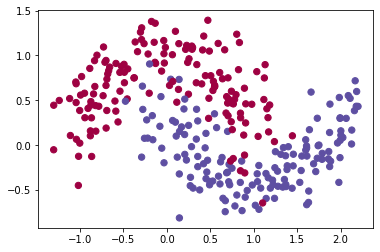

In [16]:
train_X, train_Y = load_dataset()

우리는 이미 3층 짜리 신경망을 만들어보았습니다. 이제 그 신경망에 서로 다른 알고리즘을 적용해보겠습니다. 알고리즘은: 
- Mini-batch **Gradient Descent**:  
    - `update_parameters_with_gd()`
- Mini-batch **Momentum**:  
    - `initialize_velocity()` and `update_parameters_with_momentum()`
- Mini-batch **Adam**:  
    - `initialize_adam()` and `update_parameters_with_adam()`

In [21]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

3층 짜리 신경망에 3개 알고리즘을 적용해볼겁니다.

### 5.1 - Mini-batch Gradient descent

Cost after epoch 0: 0.702405
Cost after epoch 1000: 0.668101
Cost after epoch 2000: 0.635288
Cost after epoch 3000: 0.600491
Cost after epoch 4000: 0.573367
Cost after epoch 5000: 0.551977
Cost after epoch 6000: 0.532370
Cost after epoch 7000: 0.514007
Cost after epoch 8000: 0.496472
Cost after epoch 9000: 0.468014


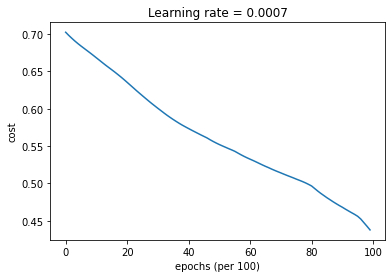

Accuracy: 0.7966666666666666


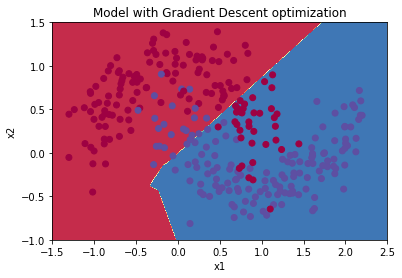

In [22]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.2 - Mini-batch gradient descent with momentum

Cost after epoch 0: 0.702413
Cost after epoch 1000: 0.668167
Cost after epoch 2000: 0.635388
Cost after epoch 3000: 0.600591
Cost after epoch 4000: 0.573444
Cost after epoch 5000: 0.552058
Cost after epoch 6000: 0.532458
Cost after epoch 7000: 0.514101
Cost after epoch 8000: 0.496652
Cost after epoch 9000: 0.468160


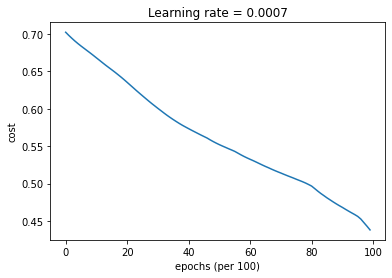

Accuracy: 0.7966666666666666


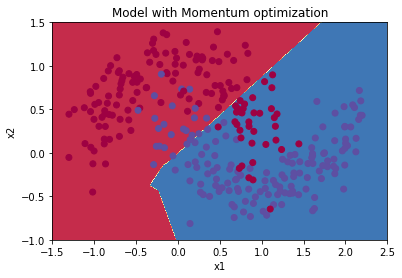

In [23]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.3 - Mini-batch with Adam mode

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167966
Cost after epoch 2000: 0.141320
Cost after epoch 3000: 0.138782
Cost after epoch 4000: 0.136111
Cost after epoch 5000: 0.134327
Cost after epoch 6000: 0.131147
Cost after epoch 7000: 0.130245
Cost after epoch 8000: 0.129655
Cost after epoch 9000: 0.129159


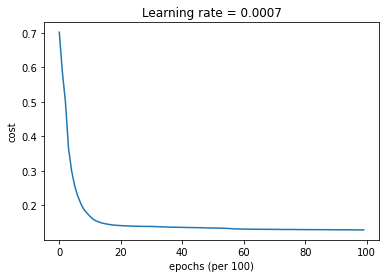

Accuracy: 0.94


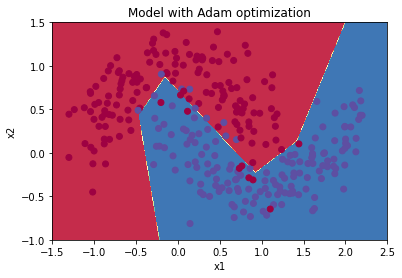

In [20]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.4 - Summary

<table> 
    <tr>
        <td>
        **optimization method**
        </td>
        <td>
        **accuracy**
        </td>
        <td>
        **cost shape**
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

모멘텀은 대개 도움이 됩니다. 하지만 단순한 데이터셋과 작은 학습률이 주어지면 모멘텀 영향력이 거의 사라집니다.

반면에 Adam은 mini-batch GD와 모멘텀 보다 성능이 좋습니다. 만약 이 3개 모델을 좀더 학습시키면 아마도 결과는 좋게 나올겁니다. 그러나 Adam이 제일 빠르게 수렴하는것은 분명합니다.


Adam의 또 다른 이점:
- 상대적으로 적은 용량 필요
- 하이퍼파라미터를 조금만 튜닝해도 잘됩니다.

**References**:

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf